In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

In [3]:
def get_prob_stroke(x_hypert, x_heartd, x_age_50_59, x_age_60_69, x_age_gt_70, x_glu_gt_160):
    beta0 = -4.8168 
    beta_hypert = 0.5596
    beta_heartd = 0.5158
    beta_age_50_59 = 1.5619
    beta_age_60_69 = 1.8712
    beta_age_gt_70 = 2.7253
    beta_glu_gt_160 = 0.6439
    s = beta0 + beta_hypert * x_hypert + beta_heartd * x_heartd + beta_age_50_59 * x_age_50_59 + beta_age_60_69 * x_age_60_69 +\
        beta_age_gt_70 * x_age_gt_70 + beta_glu_gt_160 * x_glu_gt_160
    exps = np.exp(s)
    return exps / (1+exps)

def get_prob_stroke_v1(x_hypert, x_heartd, x_age, x_glu):
    beta0 = -7.632239
    beta_hypert = 0.568359
    beta_heartd = 0.453716
    beta_age = 0.067765
    beta_glu = 0.004701
    s = beta0 + beta_hypert * x_hypert + beta_heartd * x_heartd + beta_age * x_age + beta_glu * x_glu
    exps = np.exp(s)
    return exps / (1+exps)

def get_label(x1, x2, x3):
    d_all_comb = {
        'hypert': ("NoHypert", "Hypert"),
        'heartd': ("NoHeartD", "HeartD"),
        'glu_160': ("glu<160", "glu>=160")}
    l1 = d_all_comb['hypert'][x1]
    l2 = d_all_comb['heartd'][x2]
    l5 = d_all_comb['glu_160'][x3]
    return f'{l1}-{l2}-{l5}'

In [8]:
data_points = list(product([0,1], [0,1], [0,1]))
color_list = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
markers_list = ["o", "x"]
color_markers = list(product(color_list, markers_list))

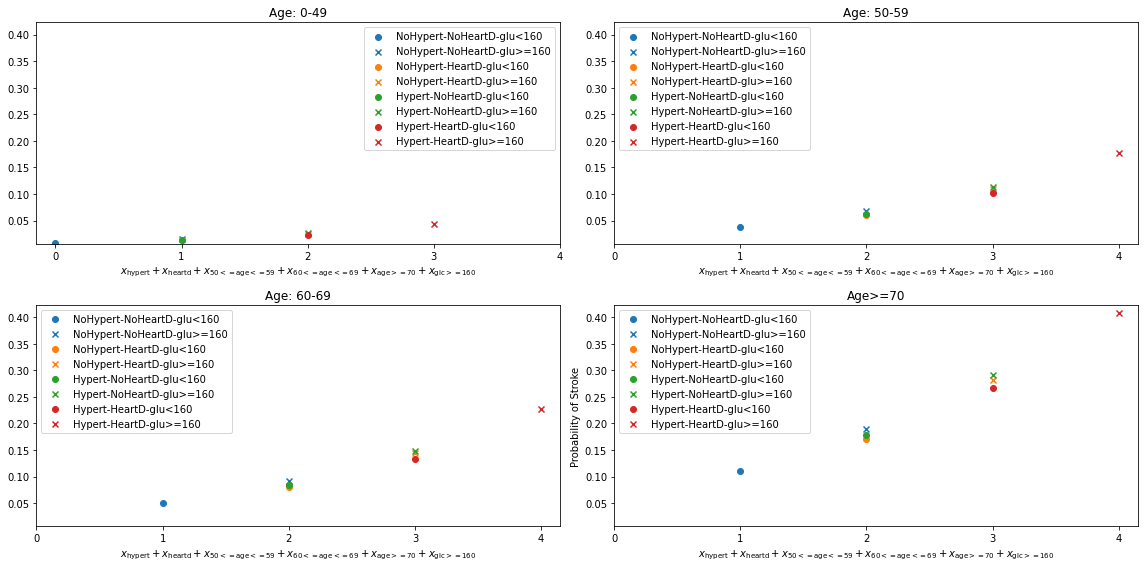

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,8), facecolor="white")

ax = axes[0,0]
x_age_50_59, x_age_60_69, x_age_gt_70 = 0, 0, 0
ax.set_title("Age: 0-49")
for idx in range(8):
    x_hypert, x_heartd, x_glu_gt_160 = data_points[idx]
    big_x = x_hypert + x_heartd + x_age_50_59 + x_age_60_69 + x_age_gt_70 + x_glu_gt_160
    p = get_prob_stroke(x_hypert, x_heartd, x_age_50_59, x_age_60_69, x_age_gt_70, x_glu_gt_160)
    color = color_markers[idx][0]
    marker = color_markers[idx][1]
    label = get_label(x_hypert, x_heartd, x_glu_gt_160)
    ax.scatter(big_x, p, color=color, marker=marker, label=label)
ax.legend()
ax.set_ylim((0.006268536171853133, 0.42291372145028266))
ax.set_xticks([0,1,2,3,4])
xlabel="$x_\mathrm{hypert}+x_\mathrm{heartd}+x_{\mathrm{50<=age<=59}}+x_{\mathrm{60<=age<=69}}+x_{\mathrm{age>=70}}+x_{\mathrm{glc>=160}}$"
ax.set_xlabel(xlabel)



ax = axes[0,1]
x_age_50_59, x_age_60_69, x_age_gt_70 = 1, 0, 0
ax.set_title("Age: 50-59")
for idx in range(8):
    x_hypert, x_heartd, x_glu_gt_160 = data_points[idx]
    big_x = x_hypert + x_heartd + x_age_50_59 + x_age_60_69 + x_age_gt_70 + x_glu_gt_160
    p = get_prob_stroke(x_hypert, x_heartd, x_age_50_59, x_age_60_69, x_age_gt_70, x_glu_gt_160)
    color = color_markers[idx][0]
    marker = color_markers[idx][1]
    label = get_label(x_hypert, x_heartd, x_glu_gt_160)
    ax.scatter(big_x, p, color=color, marker=marker, label=label)
ax.legend(loc='upper left')
ax.set_ylim((0.006268536171853133, 0.42291372145028266))
ax.set_xticks([0,1,2,3,4])
xlabel="$x_\mathrm{hypert}+x_\mathrm{heartd}+x_{\mathrm{50<=age<=59}}+x_{\mathrm{60<=age<=69}}+x_{\mathrm{age>=70}}+x_{\mathrm{glc>=160}}$"
ax.set_xlabel(xlabel)


ax = axes[1,0]
x_age_50_59, x_age_60_69, x_age_gt_70 = 0, 1, 0
ax.set_title("Age: 60-69")
for idx in range(8):
    x_hypert, x_heartd, x_glu_gt_160 = data_points[idx]
    big_x = x_hypert + x_heartd + x_age_50_59 + x_age_60_69 + x_age_gt_70 + x_glu_gt_160
    p = get_prob_stroke(x_hypert, x_heartd, x_age_50_59, x_age_60_69, x_age_gt_70, x_glu_gt_160)
    color = color_markers[idx][0]
    marker = color_markers[idx][1]
    label = get_label(x_hypert, x_heartd, x_glu_gt_160)
    ax.scatter(big_x, p, color=color, marker=marker, label=label)
ax.legend()
ax.set_ylim((0.006268536171853133, 0.42291372145028266))
ax.set_xticks([0,1,2,3,4])
xlabel="$x_\mathrm{hypert}+x_\mathrm{heartd}+x_{\mathrm{50<=age<=59}}+x_{\mathrm{60<=age<=69}}+x_{\mathrm{age>=70}}+x_{\mathrm{glc>=160}}$"
ax.set_xlabel(xlabel)


ax = axes[1,1]
x_age_50_59, x_age_60_69, x_age_gt_70 = 0, 0, 1
ax.set_title("Age>=70")
for idx in range(8):
    x_hypert, x_heartd, x_glu_gt_160 = data_points[idx]
    big_x = x_hypert + x_heartd + x_age_50_59 + x_age_60_69 + x_age_gt_70 + x_glu_gt_160
    p = get_prob_stroke(x_hypert, x_heartd, x_age_50_59, x_age_60_69, x_age_gt_70, x_glu_gt_160)
    color = color_markers[idx][0]
    marker = color_markers[idx][1]
    label = get_label(x_hypert, x_heartd, x_glu_gt_160)
    ax.scatter(big_x, p, color=color, marker=marker, label=label)
ax.legend()
ax.set_ylim((0.006268536171853133, 0.42291372145028266))
ax.set_xticks([0,1,2,3,4])
ax.set_ylabel("Probability of Stroke")
xlabel="$x_\mathrm{hypert}+x_\mathrm{heartd}+x_{\mathrm{50<=age<=59}}+x_{\mathrm{60<=age<=69}}+x_{\mathrm{age>=70}}+x_{\mathrm{glc>=160}}$"
ax.set_xlabel(xlabel)

plt.tight_layout()
#plt.savefig("regr_cate_model_final_plot.png", dpi=200, transparent=False)
plt.show()

In [15]:
def prob_array_fix_glu(x_glu):
    d_all_comb = {'hypert': ("NoHypert", "Hypert"), 'heartd': ("NoHeartD", "HeartD")}
    x_age_array = np.linspace(10,90,80)
    prob_array_store = list()
    label_store = list()
    for x_hypert, x_heartd in product([1,0],[1,0]):
        prob_array_store.append([get_prob_stroke_v1(x_hypert, x_heartd, x_age, x_glu) for x_age in x_age_array])
        ht_label = d_all_comb['hypert'][x_hypert]
        hd_label = d_all_comb['heartd'][x_heartd]
        label_store.append(f"{ht_label}-{hd_label}")
    return x_age_array, prob_array_store, label_store

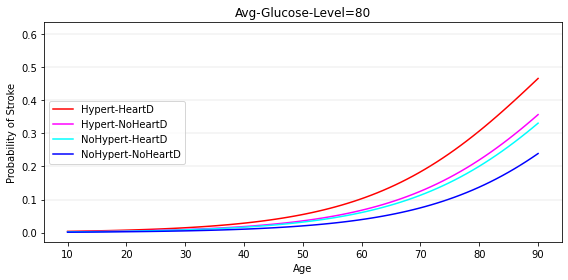

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), facecolor="white")

colors = ['red', 'magenta', 'cyan', 'blue']
x_glu = 80
x_age_array, prob_array_store, label_store = prob_array_fix_glu(x_glu)
for i in range(4):
    ax.plot(x_age_array, prob_array_store[i], label=label_store[i], color=colors[i])
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Probability of Stroke")
ax.set_title(f"Avg-Glucose-Level={x_glu}")
for xvalue in np.arange(0.1,0.7,0.1):
    ax.axhline(xvalue, color="grey", alpha=0.1)
ax.set_ylim((-0.027721126510486402, 0.6357661361044943))

plt.tight_layout()
#plt.savefig(f"./regr_final_model_glu_{x_glu}.png", dpi=200, transparent=False)
plt.show()

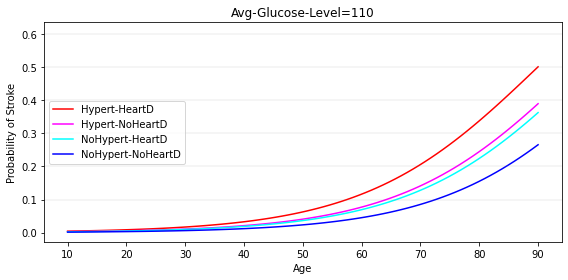

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), facecolor="white")

colors = ['red', 'magenta', 'cyan', 'blue']
x_glu = 110
x_age_array, prob_array_store, label_store = prob_array_fix_glu(x_glu)
for i in range(4):
    ax.plot(x_age_array, prob_array_store[i], label=label_store[i], color=colors[i])
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Probability of Stroke")
ax.set_title(f"Avg-Glucose-Level={x_glu}")
for xvalue in np.arange(0.1,0.7,0.1):
    ax.axhline(xvalue, color="grey", alpha=0.1)
ax.set_ylim((-0.027721126510486402, 0.6357661361044943))

plt.tight_layout()
#plt.savefig(f"./regr_final_model_glu_{x_glu}.png", dpi=200, transparent=False)
plt.show()

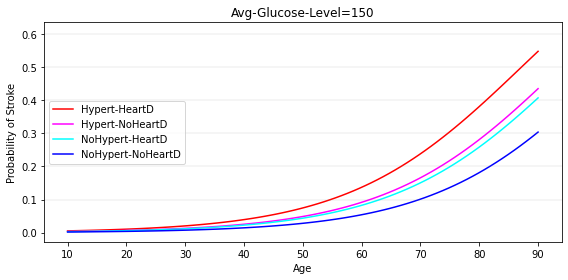

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), facecolor="white")

colors = ['red', 'magenta', 'cyan', 'blue']
x_glu = 150
x_age_array, prob_array_store, label_store = prob_array_fix_glu(x_glu)
for i in range(4):
    ax.plot(x_age_array, prob_array_store[i], label=label_store[i], color=colors[i])
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Probability of Stroke")
ax.set_title(f"Avg-Glucose-Level={x_glu}")
for xvalue in np.arange(0.1,0.7,0.1):
    ax.axhline(xvalue, color="grey", alpha=0.1)
ax.set_ylim((-0.027721126510486402, 0.6357661361044943))

plt.tight_layout()
#plt.savefig(f"./regr_final_model_glu_{x_glu}.png", dpi=200, transparent=False)
plt.show()

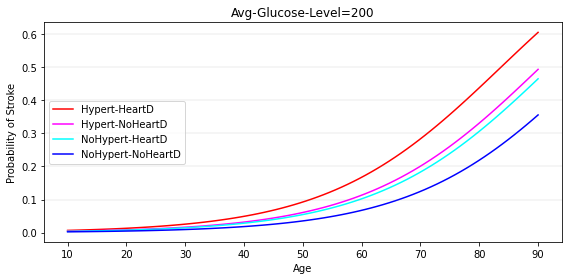

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), facecolor="white")

colors = ['red', 'magenta', 'cyan', 'blue']
x_glu = 200
x_age_array, prob_array_store, label_store = prob_array_fix_glu(x_glu)
for i in range(4):
    ax.plot(x_age_array, prob_array_store[i], label=label_store[i], color=colors[i])
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Probability of Stroke")
ax.set_title(f"Avg-Glucose-Level={x_glu}")
for xvalue in np.arange(0.1,0.7,0.1):
    ax.axhline(xvalue, color="grey", alpha=0.1)
ax.set_ylim((-0.027721126510486402, 0.6357661361044943))
#print(ax.get_ylim())

plt.tight_layout()
#plt.savefig(f"./regr_final_model_glu_{x_glu}.png", dpi=200, transparent=False)
plt.show()